In [2]:
import os
import shutil

source_dir = r"C:\Users\User\Desktop\project\videos\test"
target_dir = r"C:\Users\User\Desktop\project\videos"

# Walk through all directories and subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".mp4"):
            # Construct the source file path
            source_file_path = os.path.join(root, file)
            
            # Construct the target file path
            target_file_path = os.path.join(target_dir, file)
            
            # Move the file to the target directory
            shutil.move(source_file_path, target_file_path)
source_dir = r"C:\Users\User\Desktop\project\videos\val"
target_dir = r"C:\Users\User\Desktop\project\videos"

# Walk through all directories and subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".mp4"):
            # Construct the source file path
            source_file_path = os.path.join(root, file)
            
            # Construct the target file path
            target_file_path = os.path.join(target_dir, file)
            
            # Move the file to the target directory
            shutil.move(source_file_path, target_file_path)
source_dir = r"C:\Users\User\Desktop\project\videos\train"
target_dir = r"C:\Users\User\Desktop\project\videos"

# Walk through all directories and subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".mp4"):
            # Construct the source file path
            source_file_path = os.path.join(root, file)
            
            # Construct the target file path
            target_file_path = os.path.join(target_dir, file)
            
            # Move the file to the target directory
            shutil.move(source_file_path, target_file_path)

In [3]:
import tqdm
import random
import pathlib
import itertools
import collections

import cv2
import einops
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers
import os
import shutil
import time

import imageio
from IPython import display
from urllib import request
from tensorflow_docs.vis import embed
#tf.config.set_visible_devices([],'GPU')


In [4]:
def get_class(fname):
  """ Retrieve the name of the class given a filename.

    Args:
      fname: Name of the file in the UCF101 dataset.

    Returns:
      Class that the file belongs to.
  """
  return fname.split('_')[0]

In [5]:
def get_position(fname):
  """ Retrieve the name of the class given a filename.

    Args:
      fname: Name of the file in the UCF101 dataset.

    Returns:
      Class that the file belongs to.
  """
  try:
      return fname.split('_')[1]
  except:
      return "nope"

In [6]:
def get_files_per_class(files):
    """ Retrieve the files that belong to each class.

    Args:
      files: List of files in the dataset.

    Returns:
      Dictionary of class names (key) and files (values). 
    """
    files_for_class = collections.defaultdict(list)
    for fname in files:
        if(get_position(fname)=='hands'):
            class_name = get_class(fname)
            files_for_class[class_name].append(fname)
    return files_for_class

In [7]:
NUM_CLASSES = 100
FILES_PER_CLASS = 40

In [8]:
def select_subset_of_classes(files_for_class, classes, files_per_class):
  """ Create a dictionary with the class name and a subset of the files in that class.

    Args:
      files_for_class: Dictionary of class names (key) and files (values).
      classes: List of classes.
      files_per_class: Number of files per class of interest.

    Returns:
      Dictionary with class as key and list of specified number of video files in that class.
  """
  files_subset = dict()

  for class_name in classes:
    class_files = files_for_class[class_name]
    files_subset[class_name] = class_files[:files_per_class]

  return files_subset

In [9]:
def download_from_zip(source_dir, to_dir, file_names):
    """ Download the contents of the zip file from the zip URL.

    Args:
      zip_url: A URL with a zip file containing data.
      to_dir: A directory to download data to.
      file_names: Names of files to download.
    """
    for fn in tqdm.tqdm(file_names):
        class_name = get_class(fn)
        source_file = source_dir / fn
        output_file = to_dir / class_name / fn
        source_file.rename(output_file)

In [10]:
def split_class_lists(files_for_class, count):
  """ Returns the list of files belonging to a subset of data as well as the remainder of
    files that need to be downloaded.
    
    Args:
      files_for_class: Files belonging to a particular class of data.
      count: Number of files to download.

    Returns:
      Files belonging to the subset of data and dictionary of the remainder of files that need to be downloaded.
  """
  split_files = []
  remainder = {}
  for cls in files_for_class:
    split_files.extend(files_for_class[cls][:count])
    remainder[cls] = files_for_class[cls][count:]
  return split_files, remainder

In [14]:
def download_ucf_100_subset(num_classes, splits, download_dir):
  """ Download a subset of the UCF101 dataset and split them into various parts, such as
    training, validation, and test.

    Args:
      zip_url: A URL with a ZIP file with the data.
      num_classes: Number of labels.
      splits: Dictionary specifying the training, validation, test, etc. (key) division of data 
              (value is number of files per split).
      download_dir: Directory to download data to.

    Return:
      Mapping of the directories containing the subsections of data.
  """
  files = os.listdir(r"C:\Users\User\Desktop\project\videos")
  
  files_for_class = get_files_per_class(files)

  classes = list(files_for_class.keys())[:num_classes]

  for cls in classes:
    random.shuffle(files_for_class[cls])
    
  # Only use the number of classes you want in the dictionary
  files_for_class = {x: files_for_class[x] for x in classes}

  dirs = {}
  for split_name, split_count in splits.items():
    print(split_name, ":")
    split_dir = download_dir / split_name
    split_files, files_for_class = split_class_lists(files_for_class, split_count)
    download_from_zip(download_dir, split_dir, split_files)
    dirs[split_name] = split_dir

  return dirs

In [15]:
download_dir = pathlib.Path('C:/Users/User/Desktop/project/videos/')
subset_paths = download_ucf_100_subset(num_classes = NUM_CLASSES,
                                       splits = {"train": 24, "val": 8, "test": 8},
                                       download_dir = download_dir)

train :


100%|██████████| 2400/2400 [00:00<00:00, 2578.19it/s]


val :


100%|██████████| 800/800 [00:00<00:00, 2836.35it/s]


test :


100%|██████████| 800/800 [00:00<00:00, 2398.15it/s]


In [16]:
video_count_train = len(list(download_dir.glob('train/*/*.mp4')))
video_count_val = len(list(download_dir.glob('val/*/*.mp4')))
video_count_test = len(list(download_dir.glob('test/*/*.mp4')))
video_total = video_count_train + video_count_val + video_count_test
print(f"Total videos: {video_total}")

Total videos: 4000


In [17]:
def format_frames(frame, output_size):
  """
    Pad and resize an image from a video.
    
    Args:
      frame: Image that needs to resized and padded. 
      output_size: Pixel size of the output frame image.

    Return:
      Formatted frame with padding of specified output size.
  """
  frame = tf.image.convert_image_dtype(frame, tf.float32)
  frame = tf.image.resize_with_pad(frame, *output_size)
  return frame

In [18]:
def frames_from_video_file(video_path, n_frames, output_size = (112,112), frame_step = 1):
  """
    Creates frames from each video file present for each category.

    Args:
      video_path: File path to the video.
      n_frames: Number of frames to be created per video file.
      output_size: Pixel size of the output frame image.

    Return:
      An NumPy array of frames in the shape of (n_frames, height, width, channels).
  """
  # Read each video frame by frame
  result = []
  src = cv2.VideoCapture(str(video_path))  

  video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)

  need_length = 1 + (n_frames - 1) * frame_step

  if need_length > video_length:
    start = 0
  else:
    max_start = video_length - need_length
    start = random.randint(0, max_start + 1)

  src.set(cv2.CAP_PROP_POS_FRAMES, start)
  # ret is a boolean indicating whether read was successful, frame is the image itself
  ret, frame = src.read()
  result.append(format_frames(frame, output_size))

  for _ in range(n_frames - 1):
    for _ in range(frame_step):
      ret, frame = src.read()
    if ret:
      frame = format_frames(frame, output_size)
      result.append(frame)
    else:
      result.append(np.zeros_like(result[0]))
  src.release()
  result = np.array(result)[..., [2, 1, 0]]

  return result

In [19]:
def to_gif(images):
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images, duration=20)
  return embed.embed_file('./animation.gif')

In [20]:
class FrameGenerator:
  def __init__(self, path, n_frames, training = False):
    """ Returns a set of frames with their associated label. 

      Args:
        path: Video file paths.
        n_frames: Number of frames. 
        training: Boolean to determine if training dataset is being created.
    """
    self.path = path
    self.n_frames = n_frames
    self.training = training
    self.class_names = sorted(set(p.name for p in self.path.iterdir() if p.is_dir()))
    self.class_ids_for_name = dict((name, idx) for idx, name in enumerate(self.class_names))

  def get_files_and_class_names(self):
    video_paths = list(self.path.glob('*/*.mp4'))
    classes = [p.parent.name for p in video_paths] 
    return video_paths, classes

  def __call__(self):
    video_paths, classes = self.get_files_and_class_names()

    pairs = list(zip(video_paths, classes))

    if self.training:
      random.shuffle(pairs)

    for path, name in pairs:
      video_frames = frames_from_video_file(path, self.n_frames) 
      label = self.class_ids_for_name[name] # Encode labels
      yield video_frames, label

In [21]:
output_signature = (tf.TensorSpec(shape = (None, None, None, 3), dtype = tf.float32),
                    tf.TensorSpec(shape = (), dtype = tf.int16))
train_ds = tf.data.Dataset.from_generator(FrameGenerator(subset_paths['train'], 50, training = True),
                                          output_signature = output_signature)

# Batch the data
train_ds = train_ds.batch(2)

val_ds = tf.data.Dataset.from_generator(FrameGenerator(subset_paths['val'], 50),
                                        output_signature = output_signature)
val_ds = val_ds.batch(2)

test_ds = tf.data.Dataset.from_generator(FrameGenerator(subset_paths['test'], 50),
                                         output_signature = output_signature)

test_ds = test_ds.batch(2)

In [22]:
# Define the dimensions of one frame in the set of frames created
HEIGHT = 112
WIDTH = 112
DEPTH = 50

In [23]:
from keras import regularizers

In [25]:
input_shape = (None, DEPTH, HEIGHT, WIDTH, 3)
input = layers.Input(shape=(input_shape[1:]))

x = layers.Conv3D(filters=32, kernel_size=3, activation="relu")(input)
x = layers.MaxPool3D(pool_size=2)(x)
x = layers.BatchNormalization()(x)

# x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
# x = layers.MaxPool3D(pool_size=2)(x)
# x = layers.BatchNormalization()(x)

x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPool3D(pool_size=2)(x)
x = layers.BatchNormalization()(x)

x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPool3D(pool_size=2)(x)
x = layers.BatchNormalization()(x)

x = layers.Flatten()(x)
x = layers.Dense(units=512, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(units=100, activation="softmax")(x)

# Define the model.
model = keras.Model(input, outputs, name="3dcnn")

In [26]:
frames, label = next(iter(train_ds))
model.build(frames)

In [27]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              optimizer = keras.optimizers.Adam(learning_rate = 0.000001), 
              metrics = ['accuracy'])

In [28]:
model.summary()

Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 112, 112, 3)  0         
                             ]                                   
                                                                 
 conv3d_3 (Conv3D)           (None, 48, 110, 110, 32)  2624      
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 24, 55, 55, 32)   0         
 3D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 24, 55, 55, 32)   128       
 hNormalization)                                                 
                                                                 
 conv3d_4 (Conv3D)           (None, 22, 53, 53, 64)    55360     
                                                             

In [29]:
# Visualize the model
keras.utils.plot_model(model, expand_nested=True, dpi=60, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
history = model.fit(x = train_ds,
                    epochs = 20, 
                    validation_data = val_ds)

Epoch 1/20
    102/Unknown - 56s 475ms/step - loss: 15.8365 - accuracy: 0.0049

KeyboardInterrupt: 

In [ ]:
class Conv2Plus1D(keras.layers.Layer):
  def __init__(self, filters, kernel_size, padding):
    """
      A sequence of convolutional layers that first apply the convolution operation over the
      spatial dimensions, and then the temporal dimension. 
    """
    super().__init__()
    self.seq = keras.Sequential([  
        # Spatial decomposition
        layers.Conv3D(filters=filters,
                      kernel_size=(1, kernel_size[1], kernel_size[2]),
                      padding=padding),
        # Temporal decomposition
        layers.Conv3D(filters=filters, 
                      kernel_size=(kernel_size[0], 1, 1),
                      padding=padding)
        ])
  
  def call(self, x):
    return self.seq(x)

In [ ]:
class ResidualMain(keras.layers.Layer):
  """
    Residual block of the model with convolution, layer normalization, and the
    activation function, ReLU.
  """
  def __init__(self, filters, kernel_size):
    super().__init__()
    self.seq = keras.Sequential([
        Conv2Plus1D(filters=filters,
                    kernel_size=kernel_size,
                    padding='same'),
        layers.LayerNormalization(),
        layers.ReLU(),
        Conv2Plus1D(filters=filters, 
                    kernel_size=kernel_size,
                    padding='same'),
        layers.LayerNormalization()
    ])
    
  def call(self, x):
    return self.seq(x)

In [ ]:
class Project(keras.layers.Layer):
  """
    Project certain dimensions of the tensor as the data is passed through different 
    sized filters and downsampled. 
  """
  def __init__(self, units):
    super().__init__()
    self.seq = keras.Sequential([
        layers.Dense(units),
        layers.LayerNormalization()
    ])

  def call(self, x):
    return self.seq(x)

In [ ]:
def add_residual_block(input, filters, kernel_size):
  """
    Add residual blocks to the model. If the last dimensions of the input data
    and filter size does not match, project it such that last dimension matches.
  """
  out = ResidualMain(filters, 
                     kernel_size)(input)
  
  res = input
  # Using the Keras functional APIs, project the last dimension of the tensor to
  # match the new filter size
  if out.shape[-1] != input.shape[-1]:
    res = Project(out.shape[-1])(res)

  return layers.add([res, out])

In [ ]:
class ResizeVideo(keras.layers.Layer):
  def __init__(self, height, width):
    super().__init__()
    self.height = height
    self.width = width
    self.resizing_layer = layers.Resizing(self.height, self.width)

  def call(self, video):
    """
      Use the einops library to resize the tensor.  
      
      Args:
        video: Tensor representation of the video, in the form of a set of frames.
      
      Return:
        A downsampled size of the video according to the new height and width it should be resized to.
    """
    # b stands for batch size, t stands for time, h stands for height, 
    # w stands for width, and c stands for the number of channels.
    old_shape = einops.parse_shape(video, 'b t h w c')
    images = einops.rearrange(video, 'b t h w c -> (b t) h w c')
    images = self.resizing_layer(images)
    videos = einops.rearrange(
        images, '(b t) h w c -> b t h w c',
        t = old_shape['t'])
    return videos

In [ ]:
input_shape = (None, 100, HEIGHT, WIDTH, 3)
input = layers.Input(shape=(input_shape[1:]))
x = input

x = Conv2Plus1D(filters=16, kernel_size=(3, 7, 7), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = ResizeVideo(HEIGHT // 2, WIDTH // 2)(x)

# Block 1
x = add_residual_block(x, 16, (3, 3, 3))
x = ResizeVideo(HEIGHT // 4, WIDTH // 4)(x)

# Block 2
x = add_residual_block(x, 32, (3, 3, 3))
x = ResizeVideo(HEIGHT // 8, WIDTH // 8)(x)

# Block 3
x = add_residual_block(x, 64, (3, 3, 3))
x = ResizeVideo(HEIGHT // 16, WIDTH // 16)(x)

# Block 4
x = add_residual_block(x, 128, (3, 3, 3))

x = layers.GlobalAveragePooling3D()(x)
x = layers.Flatten()(x)
x = layers.Dense(3)(x)

model = keras.Model(input, x)

In [ ]:
frames, label = next(iter(train_ds))
model.build(frames)

In [ ]:
model.summary()

Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25, 222, 222, 3)  0         
                             ]                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 23, 220, 220, 64)  5248      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 11, 110, 110, 64)  0        
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 11, 110, 110, 64)  256      
 ormalization)                                                   
                                                                 
 conv3d_2 (Conv3D)           (None, 9, 108, 108, 128)  221312    
                                                             

In [ ]:
initial_learning_rate = 0.0001
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
#)
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=initial_learning_rate),
    metrics=["accuracy"],
    run_eagerly=True,
)

# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3d_image_classification.keras", save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

# Train the model, doing validation at the end of each epoch
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/10


ResourceExhaustedError: {{function_node __wrapped__MaxPool3DGrad_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[1,64,23,220,220] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:MaxPool3DGrad]

In [ ]:
def plot_history(history):
  """
    Plotting training and validation learning curves.

    Args:
      history: model history with all the metric measures
  """
  fig, (ax1, ax2) = plt.subplots(2)

  fig.set_size_inches(18.5, 10.5)

  # Plot loss
  ax1.set_title('Loss')
  ax1.plot(history.history['loss'], label = 'train')
  ax1.plot(history.history['val_loss'], label = 'test')
  ax1.set_ylabel('Loss')
  
  # Determine upper bound of y-axis
  max_loss = max(history.history['loss'] + history.history['val_loss'])

  ax1.set_ylim([0, np.ceil(max_loss)])
  ax1.set_xlabel('Epoch')
  ax1.legend(['Train', 'Validation']) 

  # Plot accuracy
  ax2.set_title('Accuracy')
  ax2.plot(history.history['accuracy'],  label = 'train')
  ax2.plot(history.history['val_accuracy'], label = 'test')
  ax2.set_ylabel('Accuracy')
  ax2.set_ylim([0, 1])
  ax2.set_xlabel('Epoch')
  ax2.legend(['Train', 'Validation'])

  plt.show()

plot_history(history)

NameError: name 'history' is not defined

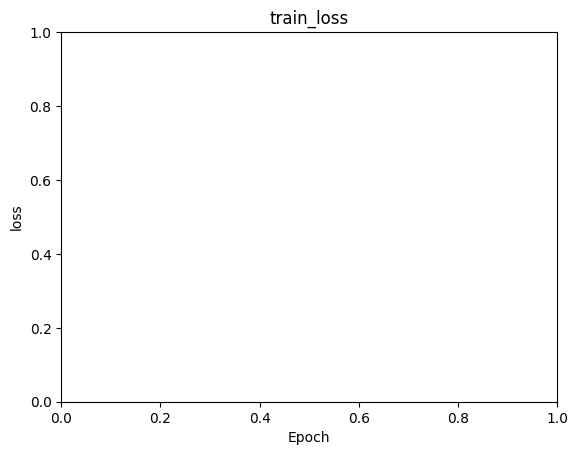

In [ ]:
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])